# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import first set of dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BA tasks/Task 2/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
#get the number of rows and colums
df.shape

(50000, 14)

In [ ]:
#get the column data types
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [ ]:
# get a count of empty values for each colum
df.isnull().values.any()

False

In [ ]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

sales_channel : ['Internet' 'Mobile']
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64
_________________________________________________________________
trip_type : ['RoundTrip' 'CircleTrip' 'OneWay']
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64
_________________________________________________________________
route : ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'B

In [ ]:
for column in df.columns:
    if df[column].dtype == np.int64:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

num_passengers : [2 1 3 4 6 5 7 9 8]
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64
_________________________________________________________________
purchase_lead : [262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40 

In [ ]:
# get a count of the complete booking from this df
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


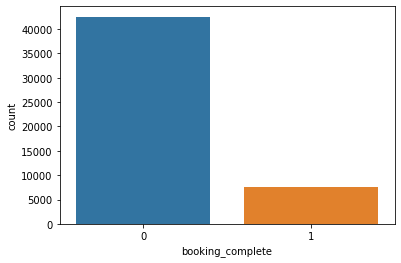

In [ ]:
# get a visual on this 
sns.countplot(df['booking_complete'])

# The dataset is imbalanced is this aspect---target variable. We might have to do something about this in a technical sense. What it shows here though is that there is very little conversion here. People look at the booking but only aroun 15% of the queries get materialized into a final booking.

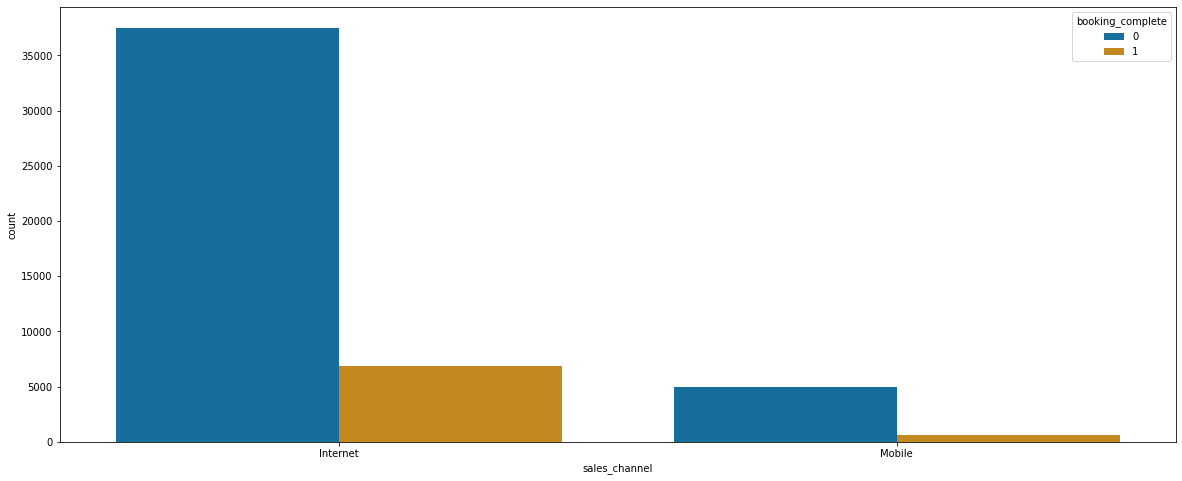

In [ ]:
# number of employees that left by their age
plt.subplots(figsize=(20,8))
sns.countplot( x= 'sales_channel', hue='booking_complete', data= df, palette= 'colorblind')

# people use their personal laptops at home or at work to check bookings----maybe improve the interface? Mobile is an option less favoured but could be investigated if it is more sucessful

We could do some more EDA but we need to look at how correlated are the variable and maybe see if we can get rid of some variables?

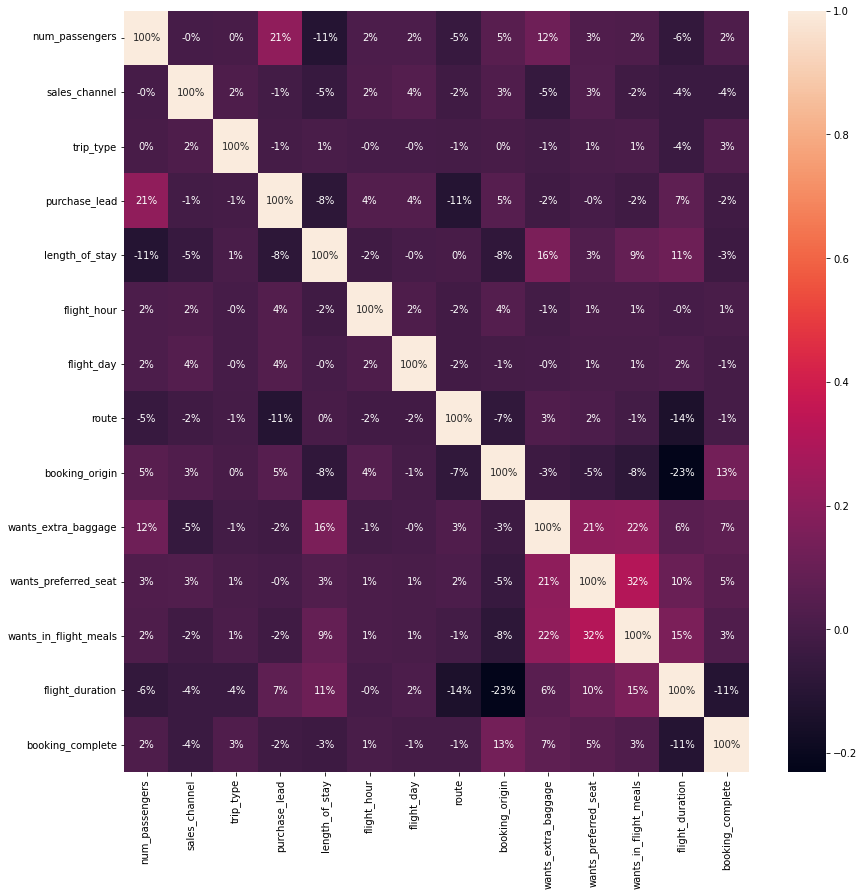

In [ ]:
#Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

I have encoded all of them as numerical as they all seem important, sales channel, booking origin etc

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-19-4e45a66a5583>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,2,262,9,7,5,0,61,1,0,0,5.52,0
1,0,0,2,112,10,3,5,0,61,0,0,0,5.52,0
2,1,0,2,243,12,17,2,0,36,1,1,0,5.52,0
3,0,0,2,96,21,4,5,0,61,0,0,1,5.52,0
4,1,0,2,68,12,15,2,0,36,1,0,1,5.52,0


# some feature construction

PCA 

In [ ]:
from sklearn.decomposition import PCA
def pca_only(df, k=3):
    pca = PCA(n_components=k)
    df_copy = df.copy()
    del df_copy['booking_complete']
    principalComponents = pca.fit_transform(df_copy)
    print(pca.explained_variance_)
    cols=[]
    for i in range(k): cols.append('PC'+str(i+1))
    principalDf = pd.DataFrame(data = principalComponents, columns = cols)
    df_pca_only = pd.concat([principalDf, df.astype(float)[['booking_complete']]], axis = 1)
    return df_pca_only
df_pca_only = pca_only(df)
df_pca_only.head()

[51780.99803269  8028.07827351  1087.1862995 ]


,PC1,PC2,PC3,booking_complete
0,-400.571575,157.552545,-16.406598,0.0
1,-392.985014,7.797548,-19.958141,0.0
2,-399.361008,138.086893,7.800518,0.0
3,-392.169950,-8.506067,-17.156528,0.0
4,-390.512090,-36.583541,3.296170,0.0


Factor Analysis

In [ ]:
# separate array into input and output components
def get_XY(df):
    array = df.values
    X = array[:,:len(df.columns)-1]
    Y = array[:,len(df.columns)-1] 
    return X,Y

X,Y = get_XY(df)

from sklearn.decomposition import FactorAnalysis
def fa_only(df, k=3):
    X,Y = get_XY(df)
    scaler = FactorAnalysis(n_components=k)
    fa_X = scaler.fit(X)
    fa_X = scaler.transform(X) 
    cols=[]
    for i in range(k): cols.append('FA'+str(i+1))
    fa_only_df = pd.DataFrame(data = fa_X, columns = cols)
    fa_only_df = pd.concat([fa_only_df, df.astype(float)[['booking_complete']]], axis = 1)
    return fa_only_df

df_fa_only = fa_only(df)
df_fa_only.head()

,FA1,FA2,FA3,booking_complete
0,-1.746974,1.766423,-0.616689,0.0
1,-1.725536,0.093461,-1.104549,0.0
2,-1.744257,1.554512,0.095419,0.0
3,-1.723250,-0.085003,-0.240136,0.0
4,-1.719247,-0.397250,0.252843,0.0


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,2,262,9,7,5,0,61,1,0,0,5.52,0
1,0,0,2,112,10,3,5,0,61,0,0,0,5.52,0
2,1,0,2,243,12,17,2,0,36,1,1,0,5.52,0
3,0,0,2,96,21,4,5,0,61,0,0,1,5.52,0
4,1,0,2,68,12,15,2,0,36,1,0,1,5.52,0


Add new features to df

In [ ]:
def add_components(df, df_constructed):
    df_copy = df.copy()
    del df_copy['booking_complete']
    df_constructed = pd.concat([df_copy, df_constructed], axis = 1)
    return df_constructed

try:
    df = add_components(df, df_pca_only)
    
except: pass

try:
    df = add_components(df, df_fa_only)
    
except: pass



print(df.shape)

(50000, 20)


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,PC1,PC2,PC3,FA1,FA2,FA3,booking_complete
0,1,0,2,262,9,7,5,0,61,1,0,0,5.52,-400.571575,157.552545,-16.406598,-1.746974,1.766423,-0.616689,0.0
1,0,0,2,112,10,3,5,0,61,0,0,0,5.52,-392.985014,7.797548,-19.958141,-1.725536,0.093461,-1.104549,0.0
2,1,0,2,243,12,17,2,0,36,1,1,0,5.52,-399.361008,138.086893,7.800518,-1.744257,1.554512,0.095419,0.0
3,0,0,2,96,21,4,5,0,61,0,0,1,5.52,-392.169950,-8.506067,-17.156528,-1.723250,-0.085003,-0.240136,0.0
4,1,0,2,68,12,15,2,0,36,1,0,1,5.52,-390.512090,-36.583541,3.296170,-1.719247,-0.397250,0.252843,0.0


Now it's time to split our data into X and Y(target)

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,PC1,PC2,PC3,FA1,FA2,FA3
0,1,0,2,262,9,7,5,0,61,1,0,0,5.52,-400.571575,157.552545,-16.406598,-1.746974,1.766423,-0.616689
1,0,0,2,112,10,3,5,0,61,0,0,0,5.52,-392.985014,7.797548,-19.958141,-1.725536,0.093461,-1.104549
2,1,0,2,243,12,17,2,0,36,1,1,0,5.52,-399.361008,138.086893,7.800518,-1.744257,1.554512,0.095419
3,0,0,2,96,21,4,5,0,61,0,0,1,5.52,-392.169950,-8.506067,-17.156528,-1.723250,-0.085003,-0.240136
4,1,0,2,68,12,15,2,0,36,1,0,1,5.52,-390.512090,-36.583541,3.296170,-1.719247,-0.397250,0.252843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,2,27,6,9,5,720,4,1,0,1,5.62,330.923608,-41.358937,24.990953,1.449612,-0.470684,0.359959
49996,0,0,2,111,6,4,6,720,4,0,0,0,5.62,326.678629,42.469024,27.196065,1.437607,0.466135,-0.925728
49997,0,0,2,24,6,22,5,720,4,0,0,1,5.62,331.070064,-44.328395,24.821556,1.450040,-0.504158,-0.106309
49998,0,0,2,15,6,11,0,720,4,1,0,1,5.62,331.530511,-53.338102,24.664973,1.451329,-0.604572,0.320669


In [ ]:
Y = df.iloc[:,-1]

In [ ]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49995    0.0
49996    0.0
49997    0.0
49998    0.0
49999    0.0
Name: booking_complete, Length: 50000, dtype: float64

Test and Training data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
 #let's check shape of the datasets
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(40000, 19)
(40000,)
(10000, 19)
(10000,)


We are going to try two models: Random Forest as suggested on the brief and XGBoost and see which one performs better and has more accuraccy

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
forest.score(X_train, Y_train)

0.983175

It does a good job with the training data, let's see with the test data

In [ ]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[8228  259]
 [1307  206]]
Model Testing Accuracy = "0.8434!"



Let's see if we can improve the model a little bit

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'class_weight': ['balanced', None],
    'max_features': ['sqrt', None]
}

# Create the random forest classifier
forest_1 = RandomForestClassifier()

# Create the random search object
random_search = RandomizedSearchCV(estimator= forest_1, param_distributions=param_grid, cv=5, n_iter=10)

# Fit the random search object to the training data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a new random forest classifier with the best hyperparameters
forest_tuned = RandomForestClassifier(**best_params)






In [ ]:
forest_tuned.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=8,
                       n_estimators=300)

In [ ]:
forest_tuned.score(X_train, Y_train)

0.939725

It's not that good with the training data, less underditting? let's see with the test data

In [ ]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm_tuned = confusion_matrix(Y_test, forest_tuned.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[8228  259]
 [1307  206]]
Model Testing Accuracy = "0.8434!"



We haven't improved much.....

In [ ]:
# Feature Importance
imp = pd.DataFrame(forest.feature_importances_, index = X_train.columns, columns = ['imp'])
imp = imp.sort_values(by ='imp', ascending = False)
imp.head(20)

,imp
PC3,0.132477
FA3,0.097363
PC1,0.093266
FA1,0.089409
PC2,0.076593
FA2,0.075097
purchase_lead,0.067126
flight_hour,0.065170
length_of_stay,0.063932
route,0.052766


<Figure size 1440x1440 with 0 Axes>

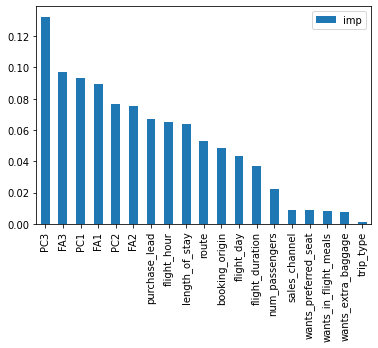

In [ ]:
plt.figure(figsize=(20,20))
imp.plot.bar()

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,PC1,PC2,PC3,FA1,FA2,FA3,booking_complete
0,1,0,2,262,9,7,5,0,61,1,0,0,5.52,-400.571575,157.552545,-16.406598,-1.746974,1.766423,-0.616689,0.0
1,0,0,2,112,10,3,5,0,61,0,0,0,5.52,-392.985014,7.797548,-19.958141,-1.725536,0.093461,-1.104549,0.0
2,1,0,2,243,12,17,2,0,36,1,1,0,5.52,-399.361008,138.086893,7.800518,-1.744257,1.554512,0.095419,0.0
3,0,0,2,96,21,4,5,0,61,0,0,1,5.52,-392.169950,-8.506067,-17.156528,-1.723250,-0.085003,-0.240136,0.0
4,1,0,2,68,12,15,2,0,36,1,0,1,5.52,-390.512090,-36.583541,3.296170,-1.719247,-0.397250,0.252843,0.0


[0.01542951 0.04958655 0.02305852 0.02260194 0.0500343  0.01073154
 0.01369951 0.04625324 0.21660084 0.12800959 0.13933095 0.03180005
 0.05623212 0.03137178 0.0199147  0.05125145 0.03806214 0.01762249
 0.03840867]


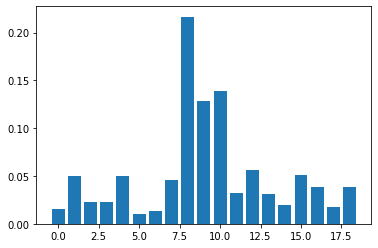

In [ ]:

# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

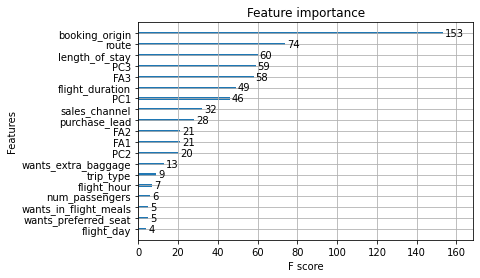

In [ ]:
from xgboost import plot_importance
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Convert the data to DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Define the parameter grid for the random search
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Define the random search
random_search = RandomizedSearchCV(model, param_grid, n_iter=10)

# Fit the random search
random_search.fit(X_train, y_train)

# Make predictions on the test set using the best model from the random search
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, predictions)
print("Improved accuracy:", accuracy)


Accuracy: 0.8457
Improved accuracy: 0.8461


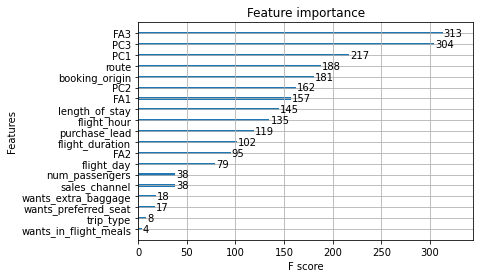

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(best_model)
plt.show()
